In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
Xs = [
    [
      [4, 2, -1],
      [1, -5, 2],
      [2, -1, -4]
    ],
    [
      [3, 4, 5],
      [-3, 7, -4],
      [1, -4, -2]
    ],
    [
      [9, -2, 3, 2],
      [2, 8, -2, 3],
      [-3, 2, 11, -4],
      [-2, 3, 2, 10]
    ]
]
Ys = [
    [41, -10, 1],
    [34, -32, 62],
    [55, -14, 12, -21]
]

def gauss_seidel(x, y, tol=0.022):
    x = np.array(x)
    y = np.array(y)

    # Validasi diagonally dominant
    diag = np.array(np.diag(np.abs(x)))
    np.fill_diagonal(x, 0)
    nonDiag = np.sum(np.abs(x), axis=1)

    if not np.all(diag > nonDiag):
        print("Not diagonally dominant")
        return False
    
    # Hitung nilai x, y, z
    x = -x
    old_matrix = np.zeros(np.shape(x[0]))
    
    for n in range(1, 16):
        new_matrix = np.array(old_matrix)
        for i, row in enumerate(x):
            new_matrix[i] = (y[i] + np.dot(new_matrix, row))/diag[i]
        
        print(f"Iter: {n} {new_matrix}")
        e = np.sqrt(np.dot(new_matrix-old_matrix, new_matrix-old_matrix))

        if(e < tol):
            return True

        old_matrix = new_matrix
    
    return False

for i in range(3):
    if gauss_seidel(Xs[i], Ys[i]):
        print("Convergent\n")
    else:
        print("Not convergent\n")

Iter: 1 [10.25   -4.05   -5.8875]
Iter: 2 [10.803125   -1.805625   -5.60296875]
Iter: 3 [ 9.75207031 -1.70922656 -5.0533418 ]
Iter: 4 [ 9.84127783 -1.94691885 -5.15736863]
Iter: 5 [ 9.93411727 -1.923876   -5.19802763]
Iter: 6 [ 9.91243109 -1.90327516 -5.18203434]
Iter: 7 [ 9.906129   -1.90841206 -5.18016752]
Convergent

Not diagonally dominant
Not convergent

Iter: 1 [ 6.11111111 -3.27777778  3.35353535 -0.56515152]
Iter: 2 [ 4.39046016 -1.79729938  2.40957938 -1.16463403]
Iter: 3 [ 5.16732568 -2.00269881  2.44080351 -0.95388592]
Iter: 4 [ 5.06444041 -2.04820201  2.49765287 -0.97218189]
Iter: 5 [ 5.03944457 -2.02087972  2.47921505 -0.98169018]
Iter: 6 [ 5.05377509 -2.02550619  2.48050699 -0.97769452]
Convergent



In [6]:
def f(x):
    return x**6 + 2*x**2 - 3

def df(x):
    return 6*x**5 + 4*x

def newton_raphson(f, df, x, n, tol=0.01):
    while(n <= 15):
        if(np.abs(f(x)) < tol):
            print("The root of equation is: ", x)
            return
        
        newValue = x - f(x)/df(x)
        print(f"Iteration of {n}: {newValue}")
        return newton_raphson(f, df, newValue, n+1)

newton_raphson(f, df, 4, 1)

Iteration of 1: 3.330357142857143
Iteration of 2: 2.7705278067251076
Iteration of 3: 2.3014692834655897
Iteration of 4: 1.9076486911265778
Iteration of 5: 1.5780738506315775
Iteration of 6: 1.3101344278134677
Iteration of 7: 1.1168277838634215
Iteration of 8: 1.0204619280744585
Iteration of 9: 1.0006965918207418
The root of equation is:  1.0006965918207418


In [7]:
a = -3
b = 3
n = 30

def f(x):
    return 4*x**4 + 2*x**3 - 6*x

h = (b-a)/(n-1)

x = np.linspace(a, b, n)
y = f(x)

leftRiemann = h*sum(y[:n-1])
rightRiemann = h*sum(y[1:])

xMid = (x[:n-1] + x[1:])/2
yMid = f(xMid)

midRiemann = h*sum(yMid)

print("Left Riemann = ", leftRiemann)
print("Right Riemann = ", rightRiemann)
print("Mid Riemann = ", midRiemann)

Left Riemann =  384.4323034267851
Right Riemann =  399.328855150923
Mid Riemann =  387.26026006636687


In [8]:
a = -1*np.pi
b = 2*np.pi
n = 27

def f(x):
    return (np.sin(x))**2 + np.sin(x) + 2

lebar = (b-a)/(n-1)

x = np.linspace(a, b, n)
y = f(x)

trapezoid = lebar*(y[0] + y[n-1] + 2*sum(y[1:n-1]))/2

print("Trapezoid Rule = ", trapezoid)

Trapezoid Rule =  21.583893023276122


m = [1.97463158] ; c = [-0.01426912]
y = [1.97463158]x + [-0.01426912]

[[ 1.97463158]
 [-0.01426912]]


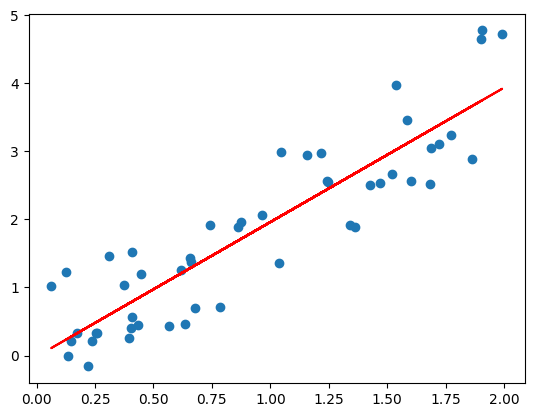

In [18]:
x = [1.3604935458559992, 1.5853985257024064, 0.5679347497479994, 0.21802392874941856, 0.06206493009274472, 1.6038707575944073, 1.5373131133875226, 1.4259588903280196, 0.43245973529077086, 0.257850612191316, 0.8605233835228834, 1.2181914607549382, 1.685409170644646, 0.12380139845637994, 0.13435858737521222, 0.4033370073012925, 0.619722978580614, 1.8628033810771025, 0.40953337540132173, 0.30874442757643994, 1.6891968832960647, 1.4690587356094642, 1.0467612052854245, 1.9070607586182264, 0.3931032996568269, 1.5213063293089268, 0.6792243360513193, 1.0368081016233708, 0.6336032973174668, 0.374905103792015, 1.771763274305583, 1.1559028146600263, 0.17306906153876445, 0.40602786961550885, 1.9021950999201134, 0.7404956567184318, 0.9651727271458386, 1.9916255775351712, 0.2532403679742896, 1.2463066512639314, 1.241263902486962, 1.7213322132140918, 1.3414349017801748, 0.8749630082448829, 0.2365239274541533, 0.6619637276533039, 0.14776060842856809, 0.44702252616842086, 0.7825174342129761, 0.6568730252477795]
y = [1.8860894486952637, 3.4538075220063913, 0.4326122937324488, -0.16109290897894835, 1.0258216227918515, 2.5614347377115334, 3.9711567124023173, 2.5050179041851806, 0.44187536608782496, 0.32763720038740907, 1.8914749598149787, 2.978721894531936, 2.5263464521598777, 1.2309986450932542, -0.0002015887018562701, 0.40845185338253454, 1.261882153097084, 2.890613004730457, 1.5142607191006958, 1.4558182978954157, 3.0535665102311498, 2.5305265858696826, 2.9943005644276735, 4.775595583754577, 0.2511451686187445, 2.662286088591588, 0.7013711036412655, 1.3574878178829441, 0.45879261586108844, 1.041383576988614, 3.2345537741888895, 2.9442588452869383, 0.32481178798514976, 0.5676922986388366, 4.6507103639541985, 1.9206250787747186, 2.0631617694637643, 4.718498033969695, 0.328918880734296, 2.5468066110409096, 2.56571088586923, 3.1028383540315225, 1.916718978555218, 1.9674896037631926, 0.20908513317900246, 1.3752289600324012, 0.21057773380247213, 1.1962232390302614, 0.7068252906124675, 1.428520921524234]

x = np.array(x)
y = np.array(y)

A = np.vstack((x, np.ones(len(x)))).T
y = y[:, np.newaxis]

pseudoinverse = np.linalg.pinv(A)
alpha = np.dot(pseudoinverse, y)

print(f"m = {alpha[0]} ; c = {alpha[1]}")
print(f"y = {alpha[0]}x + {alpha[1]}\n")
print(alpha)

plt.plot(x, y, "o")
plt.plot(x, alpha[0]*x + alpha[1], "r")